<a href="https://colab.research.google.com/github/sabvz-run/iris_k-means_scia/blob/main/iris_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
# Carregando o CSV
data = pd.read_csv('iris_unlabeled.csv')
X = data.values

print("✅ Dataset carregado!")
print(f"Shape dos dados: {X.shape}")
print(f"Total de amostras: {X.shape[0]}")
print(f"Total de features: {X.shape[1]}")

✅ Dataset carregado!
Shape dos dados: (300, 4)
Total de amostras: 300
Total de features: 4


In [20]:
# PARÂMETROS

# Parâmetro 1: Número de clusters
# Para o Iris, são 3 grupos (3 tipos de flores)
n_clusters = 3

# Parâmetro 2: Random state
random_state = 30

# Parâmetro 3: Número de inicializações
n_init = 1

# Criando o modelo K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=n_init)

# Treinando o modelo
kmeans.fit(X)

# Pegando os labels (a qual grupo cada amostra pertence)
labels = kmeans.labels_

print("=" *60)
print("K-MEANS EXECUTADO!")
print("=" * 60)
print(f"Configuração usada:")
print(f"   - Clusters: {n_clusters}")
print(f"   - Random State: {random_state}")
print(f"   - N_init: {n_init}")
print(f"Número de iterações: {kmeans.n_iter_}")
print(f"Inércia: {kmeans.inertia_:.2f}")
print("=" * 60)

K-MEANS EXECUTADO!
Configuração usada:
   - Clusters: 3
   - Random State: 30
   - N_init: 1
Número de iterações: 3
Inércia: 158.50


In [21]:
from sklearn.metrics import silhouette_score

# Calcular a silhueta
silhouette = silhouette_score(X, labels)

print("\n" + "=" * 60)
print("RESULTADO FINAL")
print("=" * 60)
print(f"SCORE SILHOUETA: {silhouette:.6f}")
print(f"NÚMERO DE ITERAÇÕES: {kmeans.n_iter_}")
print("=" * 60)

# Avaliação do Score Silhouette
if silhouette >= 0.8:
    print("✅ EXCELENTE! Score muito bom!")
elif silhouette >= 0.55:
    print("👍 BOM! Mas dá pra melhorar.")
elif silhouette >= 0.49:
    print("⚠️ ACEITÁVEL. Considere ajustar os parâmetros.")
else:
    print("❌ Score baixo. Tente outros parâmetros!")

# Avaliação do Número de Iterações
if kmeans.n_iter_ < 8:
    print("✅ Número de iterações BOM!")
elif kmeans.n_iter_ <= 15:
    print("⚠️ Número de iterações ACEITÁVEL.")
else:
    print("❌ Muitas iterações. Tente outros valores de random_state!")


RESULTADO FINAL
SCORE SILHOUETA: 0.555465
NÚMERO DE ITERAÇÕES: 3
👍 BOM! Mas dá pra melhorar.
✅ Número de iterações BOM!


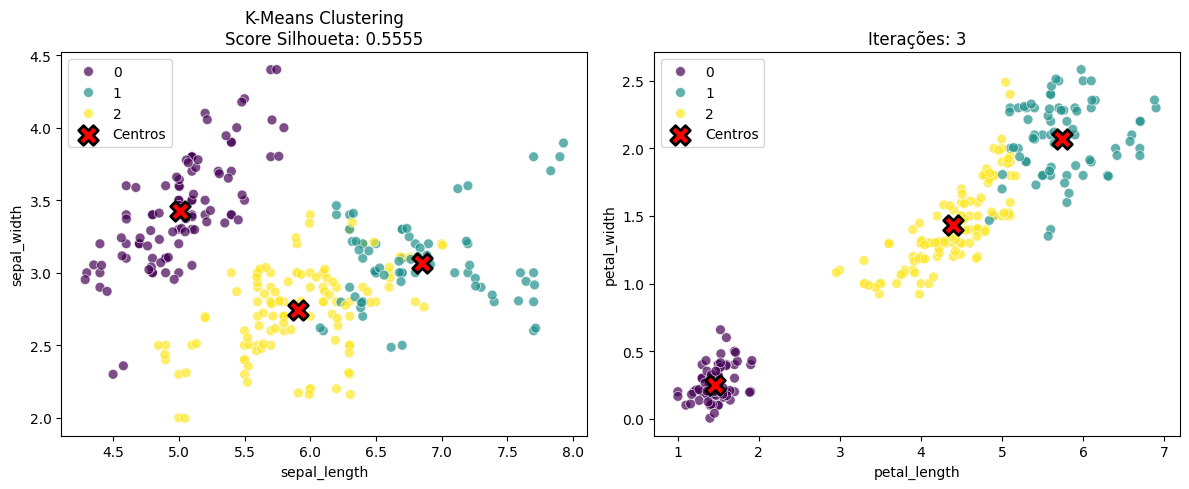

Gráfico gerado!


In [22]:
# DataFrame para visualização
df = pd.DataFrame(X, columns=['feature_' + str(i) for i in range(X.shape[1])])
df['cluster'] = labels

# Features
if X.shape[1] == 4:
    feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    df.columns = feature_names + ['cluster']
else:
    feature_names = df.columns[:-1]

# Gráfico de dispersão
plt.figure(figsize=(12, 5))

# Gráfico 1: Usando as 2 primeiras features
plt.subplot(1, 2, 1)
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['cluster'],
                palette='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', edgecolors='black', linewidths=2, label='Centros')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title(f'K-Means Clustering\nScore Silhoueta: {silhouette:.4f}')
plt.legend()

# Gráfico 2: Usando outras 2 features
if X.shape[1] >= 4:
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=df.iloc[:, 2], y=df.iloc[:, 3], hue=df['cluster'],
                    palette='viridis', s=50, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
                c='red', s=200, marker='X', edgecolors='black', linewidths=2, label='Centros')
    plt.xlabel(feature_names[2])
    plt.ylabel(feature_names[3])
    plt.title(f'Iterações: {kmeans.n_iter_}')
    plt.legend()

plt.tight_layout()
plt.show()

print("Gráfico gerado!")